In [9]:
from __future__ import print_function
import numpy as np
import argparse
import cv2

def adjust_gamma(image, gamma=1.0):
    # build a lookup table mapping the pixel values [0, 255] to
    # their adjusted gamma values
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
        for i in np.arange(0, 256)]).astype("uint8")

    # apply gamma correction using the lookup table
    return cv2.LUT(image, table)

In [10]:
help(cv2.LUT)

Help on built-in function LUT:

LUT(...)
    LUT(src, lut[, dst]) -> dst



In [4]:
# 실제 아래와 같이 argument 전달로 외부 실행 방식으로도 처리 가능함.
# python adjust_gamma.py --image example_01.png

# # construct the argument parse and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", required=True,
#     help="path to input image")
# args = vars(ap.parse_args())
 
# # load the original image
# original = cv2.imread(args["image"])

In [29]:
# original = cv2.imread('InsideOfCathedral.bmp')
# original.shape

# adjusted=original[:,:,2]

# cv2.imshow("Images", adjusted)
# cv2.waitKey(0)
# cv2.destroyAllWindows() 

In [46]:
# original = cv2.imread('InsideOfCathedral.bmp')
original = cv2.imread('OutsideView.bmp')

# loop over various values of gamma
for gamma in [0.45, 1.15, 1.25, 2.2]:
    # ignore when gamma is 1 (there will be no change to the image)
#     if gamma == 1:
#         continue

    # apply gamma correction and show the images
    gamma = gamma if gamma > 0 else 0.1
    
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
        for i in np.arange(0, 256)]).astype("uint8")
    
    adjusted = adjust_gamma(original, gamma=gamma)
    cv2.putText(adjusted, "g={}".format(gamma), (10, 30),
        cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 3)
    cv2.imshow("Images", np.hstack([original, adjusted]))
    cv2.waitKey(0)
    cv2.destroyAllWindows()    

In [85]:
table.shape

(256,)

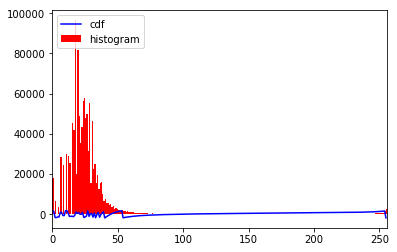

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('InsideOfCathedral.bmp',1)

hist,bins = np.histogram(img.flatten(),256,[0,256])

cdf = hist.cumsum()
# print (cdf.max())
cdf_normalized = cdf * hist.max()/ cdf.max()
# print (cdf_normalized.max())

plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [2]:
img = cv2.imread('InsideOfCathedral.bmp',0)
equ = cv2.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side
cv2.imwrite('res.png',res)

True

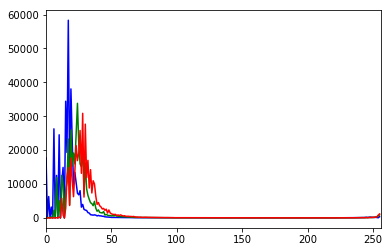

In [3]:
# import cv2
# import numpy as np
# from matplotlib import pyplot as plt
img = cv2.imread('InsideOfCathedral.bmp')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])

plt.show()

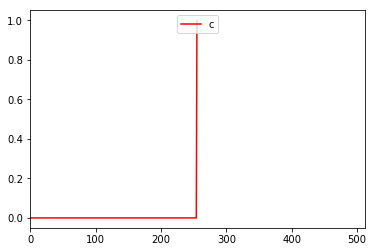

In [4]:
plt.plot(cdf/(img.size), color = 'r')
# plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,512])
plt.legend(('cdf'), loc = 'upper center')
plt.show()

In [5]:
print(img.shape)
print(img.flatten().shape)
print(768*512)
print(img.size)
# help(cv2.imread)
cv2.IMREAD_COLOR
cv2.IMREAD_GRAYSCALE
cv2.IMREAD_UNCHANGED
# dir(cv2)
print(cdf.max())
print(cdf_normalized.shape)
print(cdf.shape)
print(cdf_normalized.max())
print(hist.shape)
print(bins.shape)

(768, 512, 3)
(1179648,)
393216
1179648
1179648
(256,)
(256,)
1804
(256,)
(257,)


In [6]:
import numpy as np 

def imhist(im):
  # calculates normalized histogram of an image
	m, n = im.shape
	h = [0.0] * 256
	for i in range(m):
		for j in range(n):
			h[im[i, j]]+=1
	return np.array(h)/(m*n)

def cumsum(h):
	# finds cumulative sum of a numpy array, list
	return [sum(h[:i+1]) for i in range(len(h))]

def histeq(im):
	#calculate Histogram
	h = imhist(im)
	cdf = np.array(cumsum(h)) #cumulative distribution function
	sk = np.uint8(255 * cdf) #finding transfer function values
	s1, s2 = im.shape
	Y = np.zeros_like(im)
	# applying transfered values for each pixels
	for i in range(0, s1):
		for j in range(0, s2):
			Y[i, j] = sk[im[i, j]]
	H = imhist(Y)b
	#return transformed image, original and new istogram, 
	# and transform function
	return Y , h, H, sk

SyntaxError: invalid syntax (<ipython-input-6-1b4a100fd707>, line 27)

In [8]:
help(np.uint8)

Help on class uint8 in module numpy:

class uint8(unsignedinteger)
 |  Method resolution order:
 |      uint8
 |      unsignedinteger
 |      integer
 |      number
 |      generic
 |      __builtin__.object
 |  
 |  Methods defined here:
 |  
 |  __eq__(...)
 |      x.__eq__(y) <==> x==y
 |  
 |  __ge__(...)
 |      x.__ge__(y) <==> x>=y
 |  
 |  __gt__(...)
 |      x.__gt__(y) <==> x>y
 |  
 |  __hash__(...)
 |      x.__hash__() <==> hash(x)
 |  
 |  __index__(...)
 |      x[y:z] <==> x[y.__index__():z.__index__()]
 |  
 |  __le__(...)
 |      x.__le__(y) <==> x<=y
 |  
 |  __lt__(...)
 |      x.__lt__(y) <==> x<y
 |  
 |  __ne__(...)
 |      x.__ne__(y) <==> x!=y
 |  
 |  ----------------------------------------------------------------------
 |  Data and other attributes defined here:
 |  
 |  __new__ = <built-in method __new__ of type object>
 |      T.__new__(S, ...) -> a new object with type S, a subtype of T
 |  
 |  --------------------------------------------------------------

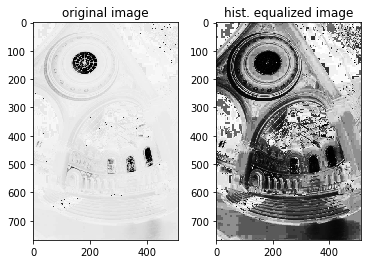

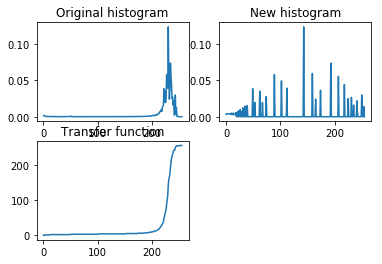

In [10]:
import pylab as plt
import matplotlib.image as mpimg
import numpy as np
# load image to numpy arrayb
# matplotlib 1.3.1 only supports png images
# use scipy or PIL for other formats
img = np.uint8(mpimg.imread('InsideOfCathedral.bmp')*255.0)
# convert to grayscale
# do for individual channels R, G, B, A for nongrayscale images

img = np.uint8((0.2126* img[:,:,0]) + \
        np.uint8(0.7152 * img[:,:,1]) +\
             np.uint8(0.0722 * img[:,:,2]))

# use hist module from hist.py to perform histogram equalization
from hist import histeq
new_img, h, new_h, sk = histeq(img)

# show old and new image
# show original image
plt.subplot(121)
plt.imshow(img)
plt.title('original image')
plt.set_cmap('gray')
# show original image
plt.subplot(122)
plt.imshow(new_img)
plt.title('hist. equalized image')
plt.set_cmap('gray')
plt.show()

# plot histograms and transfer function
fig = plt.figure()
fig.add_subplot(221)
plt.plot(h)
plt.title('Original histogram') # original histogram

fig.add_subplot(222)
plt.plot(new_h)
plt.title('New histogram') #hist of eqlauized image

fig.add_subplot(223)
plt.plot(sk)
plt.title('Transfer function') #transfer function

plt.show()

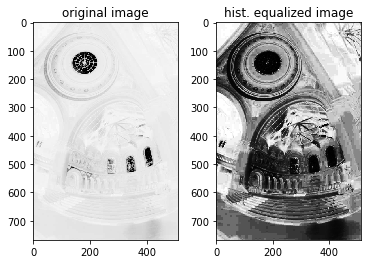

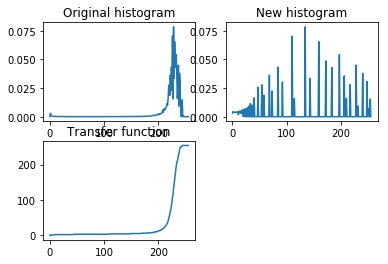

In [12]:
import pylab as plt
import matplotlib.image as mpimg
import numpy as np
# load image to numpy arrayb
# matplotlib 1.3.1 only supports png images
# use scipy or PIL for other formats
img = np.uint8(mpimg.imread('InsideOfCathedral.bmp')*255.0)
# convert to grayscale
# do for individual channels R, G, B, A for nongrayscale images

img = np.uint8(img[:,:,0])

# use hist module from hist.py to perform histogram equalization
from hist import histeq
new_img, h, new_h, sk = histeq(img)

# show old and new image
# show original image
plt.subplot(121)
plt.imshow(img)
plt.title('original image')
plt.set_cmap('gray')
# show original image
plt.subplot(122)
plt.imshow(new_img)
plt.title('hist. equalized image')
plt.set_cmap('gray')
plt.show()

# plot histograms and transfer function
fig = plt.figure()
fig.add_subplot(221)
plt.plot(h)
plt.title('Original histogram') # original histogram

fig.add_subplot(222)
plt.plot(new_h)
plt.title('New histogram') #hist of eqlauized image

fig.add_subplot(223)
plt.plot(sk)
plt.title('Transfer function') #transfer function

plt.show()

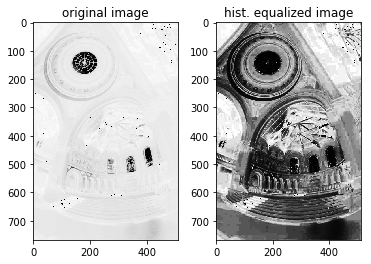

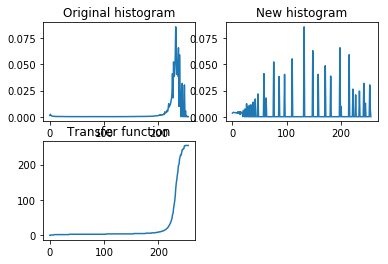

In [13]:
import pylab as plt
import matplotlib.image as mpimg
import numpy as np
# load image to numpy arrayb
# matplotlib 1.3.1 only supports png images
# use scipy or PIL for other formats
img = np.uint8(mpimg.imread('InsideOfCathedral.bmp')*255.0)
# convert to grayscale
# do for individual channels R, G, B, A for nongrayscale images

img = np.uint8(img[:,:,1])

# use hist module from hist.py to perform histogram equalization
from hist import histeq
new_img, h, new_h, sk = histeq(img)

# show old and new image
# show original image
plt.subplot(121)
plt.imshow(img)
plt.title('original image')
plt.set_cmap('gray')
# show original image
plt.subplot(122)
plt.imshow(new_img)
plt.title('hist. equalized image')
plt.set_cmap('gray')
plt.show()

# plot histograms and transfer function
fig = plt.figure()
fig.add_subplot(221)
plt.plot(h)
plt.title('Original histogram') # original histogram

fig.add_subplot(222)
plt.plot(new_h)
plt.title('New histogram') #hist of eqlauized image

fig.add_subplot(223)
plt.plot(sk)
plt.title('Transfer function') #transfer function

plt.show()

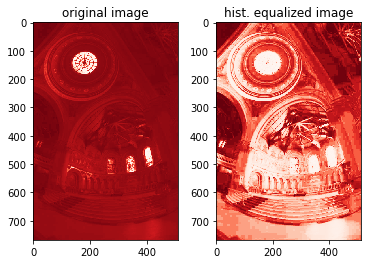

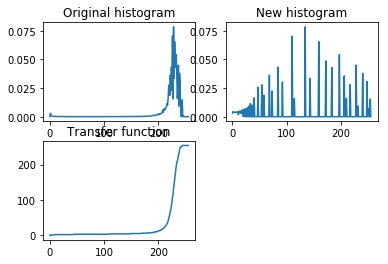

In [27]:
import pylab as plt
import matplotlib.image as mpimg
import numpy as np
# load image to numpy arrayb
# matplotlib 1.3.1 only supports png images
# use scipy or PIL for other formats
img = np.uint8(mpimg.imread('InsideOfCathedral.bmp')*255.0)
# convert to grayscale
# do for individual channels R, G, B, A for nongrayscale images

img = np.uint8(img[:,:,0])

# use hist module from hist.py to perform histogram equalization
from hist import histeq
new_img, h, new_h, sk = histeq(img)

# show old and new image
# show original image
plt.subplot(121)
plt.imshow(img)
plt.title('original image')
plt.set_cmap('Reds')
# show original image
plt.subplot(122)
plt.imshow(new_img)
plt.title('hist. equalized image')
plt.set_cmap('Reds')
plt.show()

# plot histograms and transfer function
fig = plt.figure()
fig.add_subplot(221)
plt.plot(h)
plt.title('Original histogram') # original histogram

fig.add_subplot(222)
plt.plot(new_h)
plt.title('New histogram') #hist of eqlauized image

fig.add_subplot(223)
plt.plot(sk)
plt.title('Transfer function') #transfer function

plt.show()

In [20]:
import matplotlib as mplib
# help(mplib.colors.Colormap)
help(plt.set_cmap)

Help on function set_cmap in module matplotlib.pyplot:

set_cmap(cmap)
    Set the default colormap.  Applies to the current image if any.
    See help(colormaps) for more information.
    
    *cmap* must be a :class:`~matplotlib.colors.Colormap` instance, or
    the name of a registered colormap.
    
    See :func:`matplotlib.cm.register_cmap` and
    :func:`matplotlib.cm.get_cmap`.

